**INTRODUCTION**:                                                                                    
In order for any business to thrive, the enterprise has to maximize revenue and understand their customer base. (I think Amazon does this better than any other company). **As such, the goal of this exercise was to perform customer analytics based on cluster analysis from approximately 59,000 different purchase transactions**. The dataset consists of 24 features of which the first 17 features consist of purchase behavior and the last 7 features are customer demographics. The goal was to perform customer analytics and cluster analy 

As someone with a finance background and a deep interest in marketing, I wish to employ the **Segregation, Targeting and Positioning ("STP") Marketing Mix method** to learn about different customer bases. In this particular project, I explore the "**Segregation**" and "**Positioning**" elements of the Marketing Mix method. Targeting - which is associated with various means of advertisement to appeal to different customer groups (ex: social media for customers, newspapers for senior citizens and etc) is beyond the scope of this project and will not be covered in this project. In short, Segmentation refers to breaking the customer population into various groups('clusters') based on certain demographics and/or purchasing behavior. Positioning refers to price sensitivity between different customer groups ("price elasticity"). Within Price elasticity, there is own brand **price elasticity** (how groups react to a change in price in your product) and there is **cross elasticity** (how groups react to a change in price in a competiotor's brand). To keep this excercise consise, we will only cover own price elasticity in this exercise.

Initially, I ran basic descriptive statistics on the entire customer base as a whole (Cell 5). However, in trying to uncover specific purchasing patterns, I had to segregate the customer base into different groups, or "Segments".

I determined the number of clusters using K-means (cell 12), an unsupervised learning model. Then, for each segment of customers, I:

- B2a (Cell 15): Analyzed the social-economic makeup of that cluster (age, marital status, income, education and etc) and then label them.

- B2b (Cells 18-19): Calculated the cluster size and proportion of the total customer base.

- B2c: Purchase Behavior by Segment:
    - Frequency of customers' visit to the store (Cell 22)
    - Average number of units customers purchase (Cell 23)
    - How often do customers from different segments purchase these goods (Cell 24)
    - Brand Choice by Segment (Cells 25-27)
    - Calculate revenue by Segment and Brand (Cells 28-33)
    
- C3: Used Logistic Regression, a supervised classification algorithm, to predict purchase probability and price elasticity at different price ranges for the overall market.  (Cells 36 - 40)     
 
- C4: For each segment, I calculated and plot Price Elasticity at different price points. Compared elasticity between different segments. (Cells 41-45, 46-50, 51-55, 56-60)

# A. Dataset
 - Importing and standardizing the dataset


# B. Segmentation: 
 - group the population into clusters based on demographics/purchase behavior
    
    
# C. Positioning: 
 - apply Marketing Mix techniques, including calculating and plotting Price Elasticity

## Libraries

In [1]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_columns',20000)
from IPython.core.display import Image

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression 

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## A. DATAFRAME 

In [2]:
#Load data
df_purchase=pd.read_csv(r'https://raw.githubusercontent.com/asrarahmed01/Datasets/master/16.%20purchase%20data.csv')

df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0


In [3]:
#checking for datatypes

print('All data types seem to be correct. \nSince all data types are numerical values, we can also deduce that there is no bad string data in these columns.')


df_purchase.dtypes

All data types seem to be correct. 
Since all data types are numerical values, we can also deduce that there is no bad string data in these columns.


ID                     int64
Day                    int64
Incidence              int64
Brand                  int64
Quantity               int64
Last_Inc_Brand         int64
Last_Inc_Quantity      int64
Price_1              float64
Price_2              float64
Price_3              float64
Price_4              float64
Price_5              float64
Promotion_1            int64
Promotion_2            int64
Promotion_3            int64
Promotion_4            int64
Promotion_5            int64
Sex                    int64
Marital status         int64
Age                    int64
Education              int64
Income                 int64
Occupation             int64
Settlement size        int64
dtype: object

In [4]:
#checking for missing values

print('No missing values detected.')
df_purchase.isnull().sum()

No missing values detected.


ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [5]:
#Basic descriptive analysis of social-demographic features

demographic_features=['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']

print("Analysis:\n\n01. Sex and Marital Status are binary categorical features where females are denoted with 1. As such, females make up 39% of total customers in the dataset. In the Marital Status feature, married customers are denoted as 1. As such, 39% of customers is married.\n\n02. Age and Income are continuous features which are both slightly positively skewed (mean>median). We can conclude that ~95% of the population is between the ages of 24 - 62 (2 std of 24 with the mean of ~38). Also, 95% of the population makes between $40K - $200K.\n\n03. Education, Occupation and Settlement Size are ordinal data types and can not be much analyzed from these metrics. The higher the value in these fields, the higher the level of accomplishment.")

df_purchase[demographic_features].describe()

Analysis:

01. Sex and Marital Status are binary categorical features where females are denoted with 1. As such, females make up 39% of total customers in the dataset. In the Marital Status feature, married customers are denoted as 1. As such, 39% of customers is married.

02. Age and Income are continuous features which are both slightly positively skewed (mean>median). We can conclude that ~95% of the population is between the ages of 24 - 62 (2 std of 24 with the mean of ~38). Also, 95% of the population makes between $40K - $200K.

03. Education, Occupation and Settlement Size are ordinal data types and can not be much analyzed from these metrics. The higher the value in these fields, the higher the level of accomplishment.


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


In [6]:
#standardizing the demographic features

scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_purchase[demographic_features])  

## B. Segmentation

### B1. Segmentation with PCA and Kmeans ###

**B1a. PCA Determination**

Analysis:

Going with ~80% explained variance, we will go with 3 principal components.


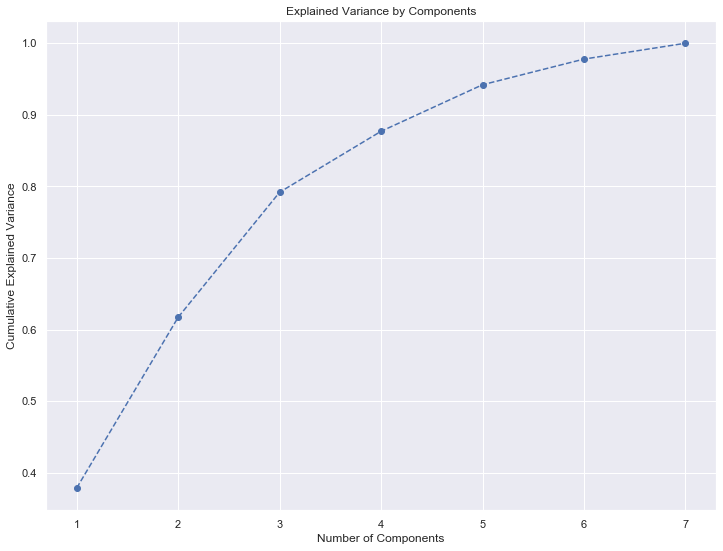

In [7]:
#initiating PCA
pca=PCA() 


#Frequently Used Attributes:
#pca.explained_variance_ratio_: provides data(variance) that is maintained with each addition feature
#pca.components_: will provide pca values for the number of requested features


#fit standardized segmentation
pca.fit(segmentation_std)  


print(f'Analysis:\n\nGoing with ~80% explained variance, we will go with 3 principal components.')

plt.figure(figsize=(12,9))
plt.plot(range(1,len(demographic_features)+1),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [8]:
#initiating PCA with 3 components
pca=PCA(n_components=3)

#fit standardized segmentation
scores_pca = pca.fit(segmentation_std)

print(f'Analysis:\n\nThe correlation loadings between the scores and the source data are reflected in the dataframe below. We can conclude that:\n01. Component 1 is best correlated with Income.\n02. Component 2 is best correlated with Sex and Marital Status\n03. Comopnent 3 is best correlated with Age.')

#dataframe out of pca.components
df_pca_comp=pd.DataFrame(data=pca.components_, columns=demographic_features, index=['Component 1','Component 2','Component 3'])


df_pca_comp

Analysis:

The correlation loadings between the scores and the source data are reflected in the dataframe below. We can conclude that:
01. Component 1 is best correlated with Income.
02. Component 2 is best correlated with Sex and Marital Status
03. Comopnent 3 is best correlated with Age.


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.044219,0.129980,0.383277,0.408239,0.514840,0.469535,0.426692
Component 2,0.627188,0.606626,0.018888,0.394983,-0.105629,-0.154097,-0.217642
Component 3,-0.188804,-0.317056,0.662721,0.405791,-0.160697,-0.399526,-0.272981


In [9]:
#transform standardized segmentation
scores_pca=pca.transform(segmentation_std)


print(f'Analysis:\n\nUsing PCA with 3 components, reduced the number of demographic dimensions from 7 to 3. The shape of the array is {scores_pca.shape}.')


#dataframe out of pca.components
df_pca_scores=pd.DataFrame(data=scores_pca, columns=['PC_1_Income/Education','PC_2_Sex/Marital Status','PC_3_Age/Experience'])

df_pca_scores.head()

Analysis:

Using PCA with 3 components, reduced the number of demographic dimensions from 7 to 3. The shape of the array is (58693, 3).


,PC_1_Income/Education,PC_2_Sex/Marital Status,PC_3_Age/Experience
0,-0.203742,-0.878217,0.925728
1,-0.203742,-0.878217,0.925728
2,-0.203742,-0.878217,0.925728
3,-0.203742,-0.878217,0.925728
4,-0.203742,-0.878217,0.925728


In [10]:
df_segm_pca_kmeans2=pd.concat([df_purchase['ID'],df_purchase[demographic_features].reset_index(drop=True),df_pca_scores],axis=1)
df_segm_pca_kmeans2.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC_1_Income/Education,PC_2_Sex/Marital Status,PC_3_Age/Experience
0,200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728
1,200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728
2,200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728
3,200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728
4,200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728


**A1b. Cluster Determination via KMeans**

In [11]:
#calculating WCSS(Within Clusters Sum of Square) for various number of clusters

#commonly used kmeans attributes
#kmeans.labels_ = attribute reflects the cluster that observation belongs to
#kmeans.inertia_ = attribute reflects the WCSS for that cluster

wcss=[]
wcss_={}
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i, random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    wcss_[i]=kmeans_pca.inertia_
    
print(f'WCSS for each number of clusters in indicated below:\n\n{wcss_}')  


WCSS for each number of clusters in indicated below:

{1: 325313.06015913025, 2: 219171.1919372306, 3: 170872.5422809697, 4: 133284.4855681133, 5: 114069.01178037147, 6: 96221.14273747613, 7: 82179.41517971006, 8: 71328.21960034898, 9: 65775.36970492407, 10: 60318.853150326286}



The optimal number of clusters seem to be 4 clusters so we will go with that.


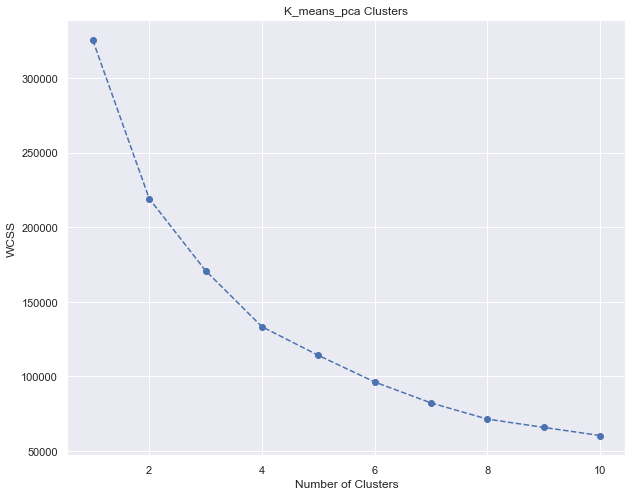

In [12]:
print('\nThe optimal number of clusters seem to be 4 clusters so we will go with that.')

plt.figure(figsize = (10,8))
plt.plot(range(1,11),list(wcss_.values()),marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K_means_pca Clusters')
plt.show()

In [13]:
#initiating Kmeans with 4 clusters
kmeans_pca=KMeans(n_clusters=4,random_state=42)

#fitting PCA-3components array into kmeans
kmeans_pca.fit(scores_pca)

#combining the original df_segmentation dataframe with the pca df   
df_segm_pca_kmeans=pd.concat([df_purchase['ID'],df_purchase[demographic_features].reset_index(drop=True),pd.DataFrame(scores_pca,columns=['PC_1_Income','PC_2_Marital_Status','PC_3_Experience'])],axis=1)

#renaming the last 3 columns
#df_segm_pca_kmeans.columns.values[-3:]=['PC_1_Income','PC_2_Marital_Status','PC_3_Experience']

#creating a new columns for labels
df_segm_pca_kmeans['Segment K-means PCA']=kmeans_pca.labels_

df_segm_pca_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC_1_Income,PC_2_Marital_Status,PC_3_Experience,Segment K-means PCA
0,200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728,1
1,200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728,1
2,200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728,1
3,200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728,1
4,200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728,1


In [14]:
#Grouping the dataset by each customer (500 customers)

df_segm_pca_kmeans_customer=df_segm_pca_kmeans.groupby('ID').mean()

print(df_segm_pca_kmeans_customer.shape)

df_segm_pca_kmeans_customer.head()

(500, 11)


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC_1_Income,PC_2_Marital_Status,PC_3_Experience,Segment K-means PCA
ID,,,,,,,,,,,
200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728,1
200000002,1,1,52,2,159052,2,1,2.611814,1.633676,-0.351029,3
200000003,0,0,28,0,113212,1,0,-1.403904,-1.519434,-0.750207,1
200000004,0,0,37,1,119602,0,0,-1.119030,-0.684253,0.943702,1
200000005,0,0,49,1,121466,1,2,1.068714,-1.450742,0.306317,0


### B2. Cluster Analysis ###
- In steps 12 and 13 above, we determined there to be 4 best clusters. We will now analyze the social-economic makeup of each cluster.

**B2a. Cluster Description, Labeling and Visualization**

In [15]:
#customer database grouped by clusters
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_customer.groupby(['Segment K-means PCA'])[df_segm_pca_kmeans.columns[1:]].mean()

#new column of the count of features grouped by clusters
df_segm_pca_kmeans_freq['N_Obs']=df_segm_pca_kmeans_customer[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()

#new column of the proportionate of each cluster
df_segm_pca_kmeans_freq['Prop_OBS']=df_segm_pca_kmeans_freq ['N_Obs'] / df_segm_pca_kmeans_freq['N_Obs'].sum()

print('Analysis:\n\n01. Cluster 0 makes up ~21% of the population & consists of all males with an avg. age of ~38. ~16% of this cluster is married.   Even though they are not highly educated, they have the 2nd highest income. We will label this cluster - "Upper_Middle_Class".\n\n02. Cluster 1 makes up ~38% of the population with an avg. age of 36. Only 10% of this cluster is married and ~25% of this group is females. This group is the least educated and has the lowest income. We will label this cluster - "Low_Income".\n\n03. Cluster 2 makes up ~23% of the population & consists of virually all females (over 90%) with an avg. age of ~30. ~86% of this cluster is married.  They are educated but do not make as much money as the Upper_Middle_Class. We will label this cluster - "Lower_Middle_Class".\n\n04. Cluster 3 makes up ~18% of the population & is evenly split between males and females. THe average age is 55 yo and ~66% of this group is married. This group makes the most income and is highly educated. We will label this cluster - "High_Income".')

df_segm_pca_kmeans_freq

Analysis:

01. Cluster 0 makes up ~21% of the population & consists of all males with an avg. age of ~38. ~16% of this cluster is married.   Even though they are not highly educated, they have the 2nd highest income. We will label this cluster - "Upper_Middle_Class".

02. Cluster 1 makes up ~38% of the population with an avg. age of 36. Only 10% of this cluster is married and ~25% of this group is females. This group is the least educated and has the lowest income. We will label this cluster - "Low_Income".

03. Cluster 2 makes up ~23% of the population & consists of virually all females (over 90%) with an avg. age of ~30. ~86% of this cluster is married.  They are educated but do not make as much money as the Upper_Middle_Class. We will label this cluster - "Lower_Middle_Class".

04. Cluster 3 makes up ~18% of the population & is evenly split between males and females. THe average age is 55 yo and ~66% of this group is married. This group makes the most income and is highly educated. 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC_1_Income,PC_2_Marital_Status,PC_3_Experience,Segment K-means PCA,N_Obs,Prop_OBS
Segment K-means PCA,,,,,,,,,,,,,
0,0.000000,0.155340,37.932039,0.815534,141745.932039,1.320388,1.495146,0.855119,-1.375613,-0.617473,0,103,0.206
1,0.247368,0.105263,36.221053,0.768421,96757.063158,0.268421,0.052632,-1.354228,-0.393639,0.503122,1,190,0.380
2,0.904348,0.860870,30.086957,1.069565,111082.843478,0.721739,0.408696,-0.525785,1.323780,-0.844277,2,115,0.230
3,0.467391,0.663043,55.315217,2.119565,163063.923913,1.239130,1.173913,2.356373,0.725252,0.713608,3,92,0.184


In [16]:
#labeling clusters

df_segm_pca_kmeans_customer['Legend']=df_segm_pca_kmeans_customer['Segment K-means PCA'].map({0:'Upper_Middle_Class',1:'Low_Income',2:'Lower_Middle_Class',3:'High_Income'})

df_segm_pca_kmeans_customer.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC_1_Income,PC_2_Marital_Status,PC_3_Experience,Segment K-means PCA,Legend
ID,,,,,,,,,,,,
200000001,0,0,47,1,110866,1,0,-0.203742,-0.878217,0.925728,1,Low_Income
200000002,1,1,52,2,159052,2,1,2.611814,1.633676,-0.351029,3,High_Income
200000003,0,0,28,0,113212,1,0,-1.403904,-1.519434,-0.750207,1,Low_Income
200000004,0,0,37,1,119602,0,0,-1.119030,-0.684253,0.943702,1,Low_Income
200000005,0,0,49,1,121466,1,2,1.068714,-1.450742,0.306317,0,Upper_Middle_Class


Even though some clusters overlap, most of the clusters are relatively better differentiated than they would have been without PCA


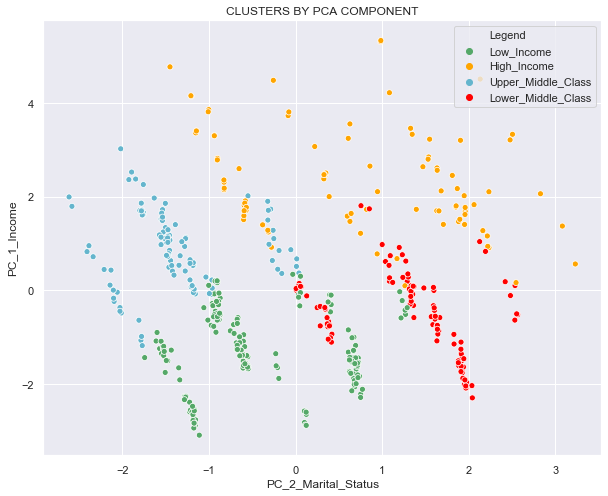

In [17]:
#Visual representation of dfferent clusters

print("Even though some clusters overlap, most of the clusters are relatively better differentiated than they would have been without PCA")


plt.figure(figsize=(10,8))

sns.scatterplot(df_segm_pca_kmeans_customer['PC_2_Marital_Status'],df_segm_pca_kmeans_customer['PC_1_Income'],hue=df_segm_pca_kmeans_customer['Legend'],palette=['g','orange','c','red'])
plt.title('CLUSTERS BY PCA COMPONENT')
plt.show()

**B2b. Segment Size and Proportions**

In [18]:
Segm_df=pd.DataFrame(df_segm_pca_kmeans_customer['Segment K-means PCA'].value_counts()).rename({'Segment K-means PCA':'Count'},axis=1)

Segm_df['Segm_Label']=['Low_Income','Lower_Middle_Class','Upper_Middle_Class','High_Income']

Segm_df['Segm_size']=Segm_df['Count']/Segm_df['Count'].sum()

Segm_df['Color']=['Green','Red','Blue','Orange']

Segm_df

,Count,Segm_Label,Segm_size,Color
1,190,Low_Income,0.380,Green
2,115,Lower_Middle_Class,0.230,Red
0,103,Upper_Middle_Class,0.206,Blue
3,92,High_Income,0.184,Orange


Analysis:

Low_Income cluster is the largest at 38% and the High_Income cluster is the smallest at 18%


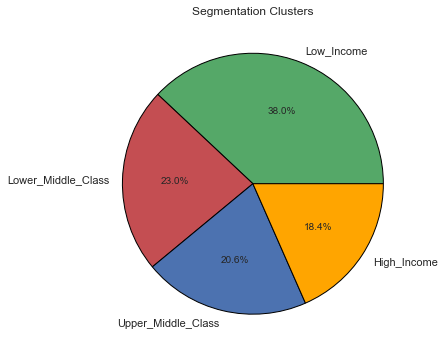

In [19]:
print('Analysis:\n\nLow_Income cluster is the largest at 38% and the High_Income cluster is the smallest at 18%')
plt.figure(figsize=(9,6))
#plt.pie(segm_prop['Segment Proportions'], labels=['Upper_Middle_Class','Low_Income','Lower-Middle_Class','High_Income'],autopct="%1.1f%%" , wedgeprops={"edgecolor":"black"},colors=['b','g','r','orange']  )


plt.pie(df_segm_pca_kmeans_customer['Segment K-means PCA'].value_counts(), labels=['Low_Income','Lower_Middle_Class','Upper_Middle_Class','High_Income'],autopct="%1.1f%%" , wedgeprops={"edgecolor":"black"},colors=['g','r','b','orange']  )

plt.title('Segmentation Clusters')
plt.show()

**B2c. Purchase Behavior by Segment**

In [20]:
# Making copy of the original dataframe
df_purchase_predictors=df_purchase.copy()

# Adding segment column to the master dataframe
df_purchase_predictors['Segment'] = df_segm_pca_kmeans['Segment K-means PCA']


print('This is the master dataframe with all the features')
df_purchase_predictors.head()

This is the master dataframe with all the features


,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1


In [21]:
#Count of the number of times each customer came to the store
df_purchase_descr = df_purchase_predictors[['ID','Day']].groupby(['ID']).count()  

#Counts the number of purchases by each customer
df_purchase_descr['N_Purchases'] = df_purchase_predictors.groupby('ID')['Incidence'].sum()  

#renaming column name
df_purchase_descr = df_purchase_descr.rename({'Day':'N_Visits'},axis=1)


#Average number of purchases (conversion rate)
df_purchase_descr['Average_N_Purchases']=df_purchase_descr['N_Purchases']/df_purchase_descr['N_Visits']

#adding series - segment number that the customer belongs to
df_purchase_descr['Segment'] = df_purchase_predictors.groupby('ID')['Segment'].mean()  


#This is a subset of the master dataframe group by customers
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,1
200000002,87,11,0.126437,3
200000003,97,10,0.103093,1
200000004,85,11,0.129412,1
200000005,111,13,0.117117,0


**B2c1. Purchase Behavior**:  How often do customers from different segments visit the store?

Analysis:

01. On average, customers from the Upper_MC Segement visit the store the most and customers from the Low_Income Segment visit  the store the least.

02. However, Upper_MC Segment also has the longest standard deviation from the mean - meaning datapoints are more spread apart and therefore, least homogeneous. This implies that some customers from this segment visit the store a lot whereas other customers from this same segment visit the store less often.

03. Standard Deviation from other clusters are similar to each other.


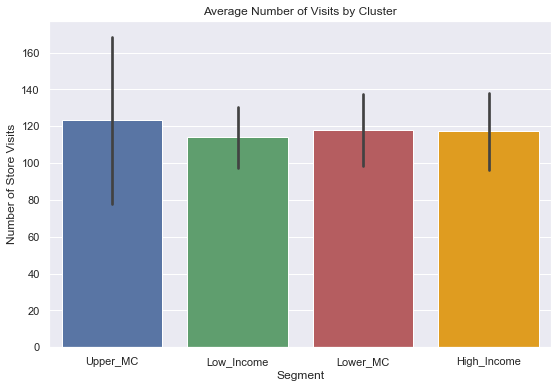

In [22]:
#How often people from different segments visit the store
print('Analysis:\n\n01. On average, customers from the Upper_MC Segement visit the store the most and customers from the Low_Income Segment visit  the store the least.\n\n02. However, Upper_MC Segment also has the longest standard deviation from the mean - meaning datapoints are more spread apart and therefore, least homogeneous. This implies that some customers from this segment visit the store a lot whereas other customers from this same segment visit the store less often.\n\n03. Standard Deviation from other clusters are similar to each other.')


plt.figure(figsize=(9,6))

sns.barplot('Segment','N_Visits',data=df_purchase_descr,ci='sd',palette=['b','g','r','orange']).set(xticklabels=["Upper_MC","Low_Income","Lower_MC","High_Income"])
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title("Average Number of Visits by Cluster")
plt.show()

**B2c2. Purchase Behavior**: How many units of goods did customers from different segments buy from the store? 

Analysis:

01. On average, customers from the Upper_MC segment bought the most units (~40 units) and the Low Income Segment bought the least (20 units).

02. However, Upper_MC Segment also has a very large standard deviation - meaning there are extreme ranges. This implies that even though this segment makes similiar amount of money, their purchasing habit is not the same.

03. Low Income Segment seems to have the smallest standard deviation-implying customers in this cluster spend in a similar fashion.


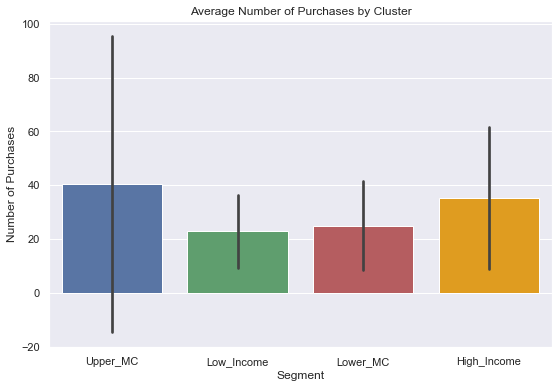

In [23]:
#How often people from different segments buy the product of interest (chocolate bar)

print('Analysis:\n\n01. On average, customers from the Upper_MC segment bought the most units (~40 units) and the Low Income Segment bought the least (20 units).\n\n02. However, Upper_MC Segment also has a very large standard deviation - meaning there are extreme ranges. This implies that even though this segment makes similiar amount of money, their purchasing habit is not the same.\n\n03. Low Income Segment seems to have the smallest standard deviation-implying customers in this cluster spend in a similar fashion.')



plt.figure(figsize=(9,6))

sns.barplot('Segment','N_Purchases',data=df_purchase_descr,ci='sd',palette=['b','g','r','orange']).set(xticklabels=["Upper_MC","Low_Income","Lower_MC","High_Income"])
plt.xlabel('Segment')
plt.ylabel('Number of Purchases')
plt.title("Average Number of Purchases by Cluster")
plt.show()

**B2c3. Purchase Behavior**: What is the average conversion rate by segment? 

Analysis:

01. On average, conversion rate for the High_Income and the Upper_MC Segments are similiar whereas conversion rate for the Low_Income and Lower_MC segments seem to be similar as well.

02. Also, the standard deviation for the Upper_MC and High_Income segments are the longest implying extreme spending habits within cluster (Some customers within the same Upper_MC and High_Income Segments have a very high conversion rate whereas other customers within the same segment have a very low conversion rate.)

03. Customers from the Low_Income and Lower_MC Segments also have similar conversion rates.


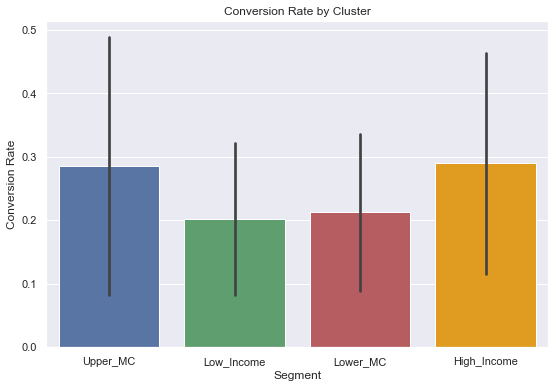

In [24]:
#How often people from different segments buy the product of interest?

print('Analysis:\n\n01. On average, conversion rate for the High_Income and the Upper_MC Segments are similiar whereas conversion rate for the Low_Income and Lower_MC segments seem to be similar as well.\n\n02. Also, the standard deviation for the Upper_MC and High_Income segments are the longest implying extreme spending habits within cluster (Some customers within the same Upper_MC and High_Income Segments have a very high conversion rate whereas other customers within the same segment have a very low conversion rate.)\n\n03. Customers from the Low_Income and Lower_MC Segments also have similar conversion rates.')



plt.figure(figsize=(9,6))

sns.barplot('Segment','Average_N_Purchases',data=df_purchase_descr,ci='sd',palette=['b','g','r','orange']).set(xticklabels=["Upper_MC","Low_Income","Lower_MC","High_Income"])
plt.xlabel('Segment')
plt.ylabel('Conversion Rate')
plt.title("Conversion Rate by Cluster")
plt.show()

**B2c4. Purchase Behavior**: What is the Brand Choice by segment? 

In [25]:
#Filter the dataframe down to only instances when the customer bought the goods and then groupby customer and then Segment

#filtering the dataframe to visits resulting in purchases and selecting relevant features
df_purchase_incidence=df_purchase_predictors[df_purchase_predictors['Incidence']==1][['ID','Segment','Brand']]

#one-hot coding of the categorical feature
brand_dummies = pd.get_dummies(df_purchase_incidence,columns=['Brand'],prefix='Brand',prefix_sep='_')

brand_dummies.head()

,ID,Segment,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
6,200000001,1,0,1,0,0,0
11,200000001,1,0,0,0,0,1
19,200000001,1,1,0,0,0,0
24,200000001,1,0,0,0,1,0
29,200000001,1,0,1,0,0,0


In [26]:
#groupby customer
temp=brand_dummies.groupby('ID').mean()

#groupby segment with mean
mean_brand_choice=temp.groupby('Segment').mean()

mean_brand_choice=mean_brand_choice.rename({0:'Upper_MC',1:'Low_Income',2:'Lower-MC',3:'High_Income'},axis=0)

mean_brand_choice.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
Upper_MC,0.075322,0.125566,0.034683,0.119305,0.645125
Low_Income,0.134667,0.665459,0.020281,0.074932,0.104662
Lower-MC,0.233076,0.407917,0.150026,0.072802,0.136178
High_Income,0.041831,0.119129,0.030329,0.601730,0.206980


Analysis: 

01.Note Brand Names are in order of from Least Expensive (Brand_1) to Most Expense (Brand_5).

02. As expected, customers from High_Income and Upper_MC segments tend to like expensive brands BUT customers from Low_Income segment prefer not the cheapest but the 2nd cheapest brand.

03. Customers from Lower_MC have a slight preference of Brand2 but they are mostly spreadout.


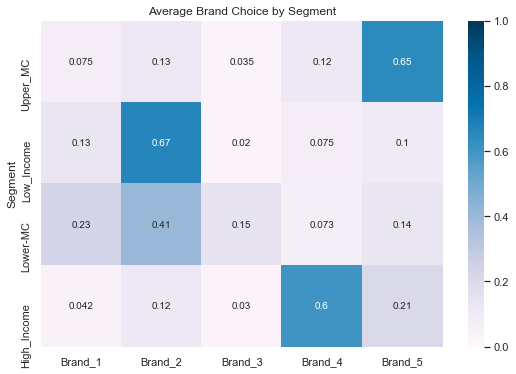

In [27]:
plt.figure(figsize=(9,6))

sns.heatmap(mean_brand_choice, vmin=0, vmax=1, cmap='PuBu',annot=True)

print('Analysis: \n\n01.Note Brand Names are in order of from Least Expensive (Brand_1) to Most Expense (Brand_5).\n\n02. As expected, customers from High_Income and Upper_MC segments tend to like expensive brands BUT customers from Low_Income segment prefer not the cheapest but the 2nd cheapest brand.\n\n03. Customers from Lower_MC have a slight preference of Brand2 but they are mostly spreadout.')

plt.title('Average Brand Choice by Segment')
plt.show()

**B2c5. Purchase Behavior**: What is the revenue earned by segment? 

In [28]:
#filtering the dataframe to only those transactions where the most expensive brand was purchased
temp=df_purchase_predictors[df_purchase_predictors['Brand']==1]

#calculating revenue of the highest brand (Price 1)
temp['Revenue Brand 1']=temp['Price_1'] * temp['Quantity']

#different dataframe for these 2 columns
segments_brand_revenue=temp[['Segment','Revenue Brand 1']].groupby('Segment').sum()

#segments_brand_revenue

In [29]:
#filtering the dataframe to only those transactions where the most expensive brand was purchased
temp=df_purchase_predictors[df_purchase_predictors['Brand']==1]

#calculating revenue (Price 2)
temp['Revenue Brand 2']=temp['Price_2'] * temp['Quantity']

#different dataframe for these 2 columns
segments_brand_revenue['Revenue Brand 2']=temp[['Segment','Revenue Brand 2']].groupby('Segment').sum()

#segments_brand_revenue

In [30]:
#filtering the dataframe to only those transactions where the most expensive brand was purchased
temp=df_purchase_predictors[df_purchase_predictors['Brand']==1]

#calculating revenue (Price 3)
temp['Revenue Brand 3']=temp['Price_3'] * temp['Quantity']

#different dataframe for these 2 columns
segments_brand_revenue['Revenue Brand 3']=temp[['Segment','Revenue Brand 3']].groupby('Segment').sum()

#segments_brand_revenue

In [31]:
#filtering the dataframe to only those transactions where the most expensive brand was purchased
temp=df_purchase_predictors[df_purchase_predictors['Brand']==1]

#calculating revenue (Price 4)
temp['Revenue Brand 4']=temp['Price_4'] * temp['Quantity']

#different dataframe for these 2 columns
segments_brand_revenue['Revenue Brand 4']=temp[['Segment','Revenue Brand 4']].groupby('Segment').sum()

#segments_brand_revenue

In [32]:
#filtering the dataframe to only those transactions where the most expensive brand was purchased
temp=df_purchase_predictors[df_purchase_predictors['Brand']==1]

#calculating revenue (Price 5)
temp['Revenue Brand 5']=temp['Price_5'] * temp['Quantity']

#different dataframe for these 2 columns
segments_brand_revenue['Revenue Brand 5']=temp[['Segment','Revenue Brand 5']].groupby('Segment').sum()

#segments_brand_revenue

In [33]:
segments_brand_revenue['Total']=segments_brand_revenue['Revenue Brand 1']+segments_brand_revenue['Revenue Brand 2']+segments_brand_revenue['Revenue Brand 3']+segments_brand_revenue['Revenue Brand 4']+segments_brand_revenue['Revenue Brand 5']

segments_brand_revenue['Segment_Proportion']=segments_brand_revenue['Total']/segments_brand_revenue['Total'].sum()

segments_brand_revenue = segments_brand_revenue.append(segments_brand_revenue.sum(numeric_only=True), ignore_index=True).rename(index={0:'Upper_MC',1:'Low_Income',2:'Lower_MC',3:'High_Income',4:'Total'})


print('Analysis:\n\n01. Note based on the pie chart from earlier, Lower_MC segment makes up only 23% of the total customer base but per table below, brings in ~42% of total revenue.\n\n02. Similarly, Upper_MC and High_Income segments make up ~39% of the customer base but bring in ~22% of total revenue.\n\n03.In terms of brand preferability, even though High_Income and Upper_MC prefer high-end goods (refer to the heatmap above), most of the revenue is derived from Low_Income and Lower_MC segments.')

segments_brand_revenue

Analysis:

01. Note based on the pie chart from earlier, Lower_MC segment makes up only 23% of the total customer base but per table below, brings in ~42% of total revenue.

02. Similarly, Upper_MC and High_Income segments make up ~39% of the customer base but bring in ~22% of total revenue.

03.In terms of brand preferability, even though High_Income and Upper_MC prefer high-end goods (refer to the heatmap above), most of the revenue is derived from Low_Income and Lower_MC segments.


,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total,Segment_Proportion
Upper_MC,707.95,929.61,1053.85,1131.82,1388.76,5211.99,0.110752
Low_Income,2240.59,3026.23,3404.06,3684.01,4491.31,16846.20,0.357971
Lower_MC,2671.54,3604.70,4015.73,4330.05,5280.55,19902.57,0.422917
High_Income,685.57,873.43,1041.69,1135.06,1363.67,5099.42,0.108360
Total,6305.65,8433.97,9515.33,10280.94,12524.29,47060.18,1.000000


## C. Positioning - Price Elasticity

### C1. Defining Price Elasticity/Purchase Probability
    - Price Elasticity = % change in purchase probability in response to a 1% change in price
    - We analyze price elasticity based on a range of prices (from the lowest price point to the highest price point)

Price Elasticity formula:

 E = Coef * price * (1-Pr(purchase))


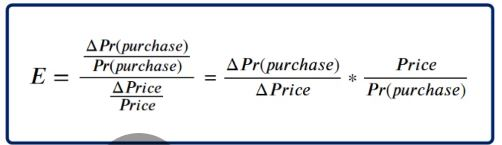

In [34]:
#making a copy of the master dataframe
df_pa=df_purchase_predictors.copy()

print("Price Elasticity formula:\n\n E = Coef * price * (1-Pr(purchase))")

Price_Elasticity=Image(r'https://raw.githubusercontent.com/asrarahmed01/Datasets/master/17.%20Price_Elasticity.JPG')
Price_Elasticity

### C2. Price Range 
- used to calculate price elasticity

In [35]:
#Saving price ceiling and floor to a variable. Price elasticity will calculated for each price point at an interval of .05 between these 2 prices.

min_price=df_pa[["Price_1","Price_2","Price_3","Price_4","Price_5"]].describe().loc[["min","max"],:].min().min()

max_price=df_pa[["Price_1","Price_2","Price_3","Price_4","Price_5"]].describe().loc[["min","max"],:].max().max()

#setting up price range from the lowest to the highest in intervals of $.05
price_range=np.arange(min_price,max_price,.05)

#converting each price to a list to feed to the model
price_range_=[[price] for price in price_range] #you can either make a list out of each element or put the list in a dataframe (but in any case, the model can only take inputs in a list)

print(f'\nPrices for all the brands range from ${min_price} to ${max_price} so this is what we are going to use for elasticity purposes.')

#dataframe of price ranges
df_price_elasticities=pd.DataFrame(price_range, columns=['Price_Range'])

df_price_elasticities.head()


Prices for all the brands range from $1.1 to $2.8 so this is what we are going to use for elasticity purposes.


,Price_Range
0,1.10
1,1.15
2,1.20
3,1.25
4,1.30


### C3. Price Elasticity

$\color{blue}{\text{B3a. Price Elasticity of the Overall Market}}$
- How likely are customers to buy the goods given a varying price range?

In [36]:
#Designating Inputs and Outputs

#Average price for each brand as input
X = pd.DataFrame()
X['Mean_Price']=df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].mean(axis=1)

# We want to predict whether the customer bought or not so df_pa['incidence']
Y=df_pa['Incidence']

In [37]:
#Model Preparation

#initiating a class
model_purchase=LogisticRegression(solver='sag',random_state=42) 

#fitting the data
model_purchase.fit(X,Y)

#For a change of one unit in the input(Price), output(Purchase) is going to go down by 2.35% 
model_purchase.coef_   

array([[-2.34801177]])

In [38]:
#feed the price range into the model to predict purchase probabilities (similiar to predict method)
Y_pr=model_purchase.predict_proba(price_range_)  

print(f'This predicts the probability of the different classes of logistic regression (0 or 1). The columns reflect the probabilties of 0 and 1, respectively.Below is the first 5 probabilities: \n\n{Y_pr[:5]}\n\n Since we are only interested in \'1\'s (Purchase Incidence), we can just get the 2nd column')

#Purchase probability of the product of interest as a whole (saving only the second column)
purchase_pr = Y_pr[:,1] 

This predicts the probability of the different classes of logistic regression (0 or 1). The columns reflect the probabilties of 0 and 1, respectively.Below is the first 5 probabilities: 

[[0.26796897 0.73203103]
 [0.29161545 0.70838455]
 [0.31644654 0.68355346]
 [0.34237011 0.65762989]
 [0.3692701  0.6307299 ]]

 Since we are only interested in '1's (Purchase Incidence), we can just get the 2nd column


In [39]:
#price elasticity (Probability of NOT buying * Price * Coeff_)
df_price_elasticities['Mean_PE'] = model_purchase.coef_[:,0] * price_range * (1 - purchase_pr)  


df_price_elasticities.head()

,Price_Range,Mean_PE
0,1.10,-0.692114
1,1.15,-0.787424
2,1.20,-0.891624
3,1.25,-1.004861
4,1.30,-1.127166


Analysis:
1. As prices go up, Elasticity decreases.
At a price point of $1.10, an increase in price by 1% will result in a decrease in purchase probability of .69%. Since a 1% reduction in price would result in less than 1% reduction in demand, this price point is deemed to be INELASTIC. However,at a price point of $1.50, an increase in price by 1% will result in a decrease in purchase probability of 1.7%. Since a 1% reduction in price would result in less than 1% reduction in demand, this price point is deemed to be INELASTIC.

2. Elasticity is definited as when the absolute value of pe(Purchase Elasticity) is MORE than 1. Hence, referring to the dataframe above and reinforced by the plot below, our product changes from 'INELASTIC' to 'ELASTIC' at a price point of $1.25 as this is where the pe exceeds 1.

3. Note from a price point of 1.10 to 1.25, line is not as steep (INELASTIC) but after 1.25, the line is very steep (ELASTIC). 

4. Overall Market Strategy from this plot would be th

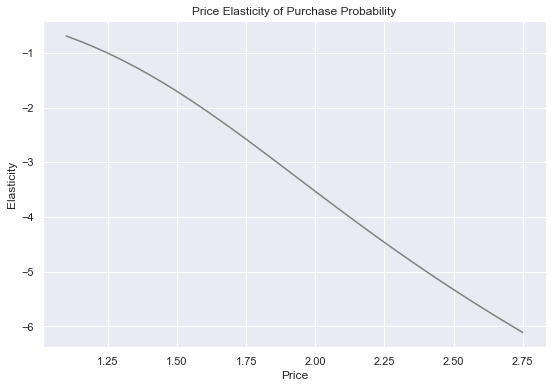

In [40]:
print('Analysis:\n1. As prices go up, Elasticity decreases.\nAt a price point of $1.10, an increase in price by 1% will result in a decrease in purchase probability of .69%. Since a 1% reduction in price would result in less than 1% reduction in demand, this price point is deemed to be INELASTIC. However,at a price point of $1.50, an increase in price by 1% will result in a decrease in purchase probability of 1.7%. Since a 1% reduction in price would result in less than 1% reduction in demand, this price point is deemed to be INELASTIC.\n\n2. Elasticity is definited as when the absolute value of pe(Purchase Elasticity) is MORE than 1. Hence, referring to the dataframe above and reinforced by the plot below, our product changes from \'INELASTIC\' to \'ELASTIC\' at a price point of $1.25 as this is where the pe exceeds 1.\n\n3. Note from a price point of 1.10 to 1.25, line is not as steep (INELASTIC) but after 1.25, the line is very steep (ELASTIC). \n\n4. Overall Market Strategy from this plot would be that for price points below 1.25, we can increase the price a bit without losing much demand and for prices above 1.25, we can increase demand by cutting price a little bit.')

plt.figure(figsize=(9,6))
plt.plot(price_range, df_price_elasticities['Mean_PE'], color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

plt.show()

### C4. Price Elasticity By Segment
- How likely are customers from different segments to buy our product given a varying price range?

$\color{blue}{\text{C4a. Upper_Middle_Class (Segment 0)}}$

In [41]:
#filter down the dataframe to Segment 0
df_pa_segment_Upper_MC = df_pa[df_pa['Segment'] == 0]
#________________________________________________________________________________________________________________

#Designating Inputs and Outputs

#Average price for each brand as input
X = pd.DataFrame()
X['Mean_Price']=df_pa_segment_Upper_MC[['Price_1','Price_2','Price_3','Price_4','Price_5']].mean(axis=1)

# We want to predict whether the customer bought or not so df_pa['incidence']
Y=df_pa_segment_Upper_MC['Incidence']

In [42]:
#Model Preparation

#initiating a class (saving it to a variable)
model_purchase_Upper_MC=LogisticRegression(solver='sag') 

#fitting the data
model_purchase_Upper_MC.fit(X,Y)

#For a chance of one unit in the input(Price), output(Purchase) is going to go down by 1.57% 
model_purchase_Upper_MC.coef_  

array([[-1.56985561]])

In [43]:
#feed the price range into the model to predict purchase probabilities for the Standard Segment 
Y_pr_segment_Upper_MC=model_purchase_Upper_MC.predict_proba(price_range_)  #predict_proba is a logistic regression method that predicts probabilities


print(f'This predicts the probability of the different classes of logistic regression (0 or 1). The columns reflect the probabilties of 0 and 1, respectively.Below is the first 5 probabilities: \n\n{Y_pr_segment_Upper_MC[:5]}\n\n Since we are only interested in \'1\'s (Purchase Incidence), we can just get the 2nd column')

#"Standard" Segment Purchase probability of the product of interest as a whole (saving only the second column)
purchase_pr_segment_Upper_MC = Y_pr_segment_Upper_MC[:,1] 

This predicts the probability of the different classes of logistic regression (0 or 1). The columns reflect the probabilties of 0 and 1, respectively.Below is the first 5 probabilities: 

[[0.33325754 0.66674246]
 [0.35092051 0.64907949]
 [0.36900152 0.63099848]
 [0.38745803 0.61254197]
 [0.40624336 0.59375664]]

 Since we are only interested in '1's (Purchase Incidence), we can just get the 2nd column


In [44]:
#price elasticity (Probability of NOT buying * Price * Coeff_)
df_price_elasticities['PE_Segment_Upper_MC'] = model_purchase_Upper_MC.coef_[:,0] * price_range * (1 - purchase_pr_segment_Upper_MC)  


#dataframe of different price levels along with overall price elasticity and price elasticity specific to a particular segment
df_price_elasticities.head()

,Price_Range,Mean_PE,PE_Segment_Upper_MC
0,1.10,-0.692114,-0.575483
1,1.15,-0.787424,-0.633529
2,1.20,-0.891624,-0.695135
3,1.25,-1.004861,-0.760316
4,1.30,-1.127166,-0.829066


Analysis:

01. For the Upper_MC segment(blue line), Purchase Probability converts from INELASTIC TO ELASTIC at $1.45. Contrast the $1.45 elasticity   tipping point for the Upper_MC Segment to the $1.25 elasticity tipping point for the overall population.

02. This would imply that for customers in the Upper_MC segment, we can get away with increasing the price up to $1.45 but if  it is already higher than that, then it would be better to decrease the price closer to $1.45.


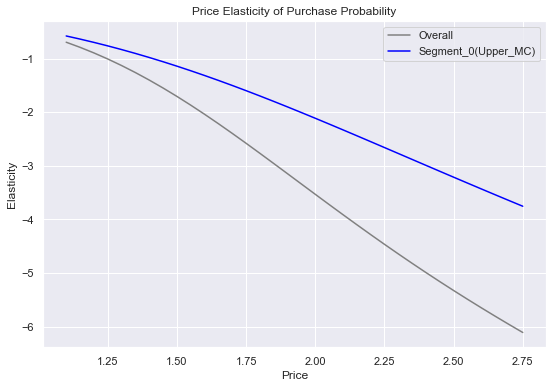

In [45]:
#plotting price elasticity
print('Analysis:\n\n01. For the Upper_MC segment(blue line), Purchase Probability converts from INELASTIC TO ELASTIC at $1.45. Contrast the $1.45 elasticity   tipping point for the Upper_MC Segment to the $1.25 elasticity tipping point for the overall population.\n\n02. This would imply that for customers in the Upper_MC segment, we can get away with increasing the price up to $1.45 but if  it is already higher than that, then it would be better to decrease the price closer to $1.45.')
plt.figure(figsize=(9,6))
plt.plot(price_range, df_price_elasticities['Mean_PE'], color = 'grey',label='Overall')
plt.plot(price_range, df_price_elasticities['PE_Segment_Upper_MC'], color = 'blue',label='Segment_0(Upper_MC)')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend()
plt.title('Price Elasticity of Purchase Probability')

plt.show()

$\color{blue}{\text{C4b. Low Income (Segment 1)}}$

In [46]:
#filter down the dataframe to Segment 1
df_pa_segment_Low_Income = df_pa[df_pa['Segment'] == 1]
#________________________________________________________________________________________________________________

#Designating Inputs and Outputs

#Average price for each brand as input
X = pd.DataFrame()
X['Mean_Price']=df_pa_segment_Low_Income[['Price_1','Price_2','Price_3','Price_4','Price_5']].mean(axis=1)

# We want to predict whether the customer bought or not so df_pa['incidence']
Y=df_pa_segment_Low_Income['Incidence']

In [47]:
#Model Preparation

#initiating a class (saving it to a variable)
model_purchase_Low_Income=LogisticRegression(solver='sag') 

#fitting the data
model_purchase_Low_Income.fit(X,Y)

#For a chance of one unit in the input(Price), output(Purchase) is going to go down by 3.57% 
model_purchase_Low_Income.coef_  

array([[-3.56919111]])

In [48]:
#feed the price range into the model to predict purchase probabilities for the Standard Segment 
Y_pr_segment_Low_Income=model_purchase_Low_Income.predict_proba(price_range_)  #predict_proba is a logistic regression method that predicts probabilities


print(f'This predicts the probability of the different classes of logistic regression (0 or 1). The columns reflect the probabilties of 0 and 1, respectively.Below is the first 5 probabilities: \n\n{Y_pr_segment_Low_Income[:5]}\n\n Since we are only interested in \'1\'s (Purchase Incidence), we can just get the 2nd column')

#"Standard" Segment Purchase probability of the product of interest as a whole (saving only the second column)
purchase_pr_segment_Low_Income = Y_pr_segment_Low_Income[:,1] 

This predicts the probability of the different classes of logistic regression (0 or 1). The columns reflect the probabilties of 0 and 1, respectively.Below is the first 5 probabilities: 

[[0.14013972 0.85986028]
 [0.16305505 0.83694495]
 [0.18889429 0.81110571]
 [0.21776286 0.78223714]
 [0.24968524 0.75031476]]

 Since we are only interested in '1's (Purchase Incidence), we can just get the 2nd column


In [49]:
#price elasticity (Probability of NOT buying * Price * Coeff_)
df_price_elasticities['PE_Segment_Low_Income'] = model_purchase_Low_Income.coef_[:,0] * price_range * (1 - purchase_pr_segment_Low_Income)  


#dataframe of different price levels along with overall price elasticity and price elasticity specific to a particular segment
df_price_elasticities.head()

,Price_Range,Mean_PE,PE_Segment_Upper_MC,PE_Segment_Low_Income
0,1.10,-0.692114,-0.575483,-0.550204
1,1.15,-0.787424,-0.633529,-0.669271
2,1.20,-0.891624,-0.695135,-0.809040
3,1.25,-1.004861,-0.760316,-0.971547
4,1.30,-1.127166,-0.829066,-1.158527


Analysis:

01. For the Low_Income segment(green line), Purchase Probability converts from INELASTIC TO ELASTIC between $1.25 and $1.30.
Contrast this elasticity tipping point for the Low Income Segment to the $1.25 elasticity tipping point for the overall population. Even though tipping points for the Low Income segment is similar to the overall market, the elasticity for the Low Income segment is much lower (as indicated by the steepness of the green line below) than the overall market with each increase in price.

02. This would imply that for customers in the Low Income segment, we have to keep the price between $1.25 and $1.30. With each price point higher than $1.30, the demand for the good would decrease much faster in this segment than the overall market as a whole.


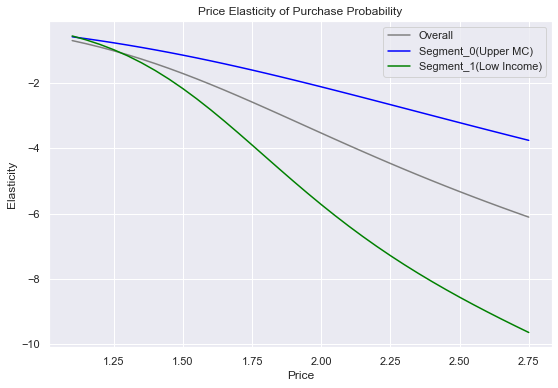

In [50]:
#plotting price elasticity
print('Analysis:\n\n01. For the Low_Income segment(green line), Purchase Probability converts from INELASTIC TO ELASTIC between $1.25 and $1.30.\nContrast this elasticity tipping point for the Low Income Segment to the $1.25 elasticity tipping point for the overall population. Even though tipping points for the Low Income segment is similar to the overall market, the elasticity for the Low Income segment is much lower (as indicated by the steepness of the green line below) than the overall market with each increase in price.\n\n02. This would imply that for customers in the Low Income segment, we have to keep the price between $1.25 and $1.30. With each price point higher than $1.30, the demand for the good would decrease much faster in this segment than the overall market as a whole.')
plt.figure(figsize=(9,6))
plt.plot(price_range, df_price_elasticities['Mean_PE'], color = 'grey',label='Overall')
plt.plot(price_range, df_price_elasticities['PE_Segment_Upper_MC'], color = 'blue',label='Segment_0(Upper MC)')
plt.plot(price_range, df_price_elasticities['PE_Segment_Low_Income'], color = 'green',label='Segment_1(Low Income)')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend()
plt.title('Price Elasticity of Purchase Probability')

plt.show()

$\color{blue}{\text{C4c. Lower_Middle_Class (Segment 2)}}$

In [51]:
#filter down the dataframe to Segment 2
df_pa_segment_Lower_MC = df_pa[df_pa['Segment'] == 2]
#________________________________________________________________________________________________________________

#Designating Inputs and Outputs

#Average price for each brand as input
X = pd.DataFrame()
X['Mean_Price']=df_pa_segment_Lower_MC[['Price_1','Price_2','Price_3','Price_4','Price_5']].mean(axis=1)

# We want to predict whether the customer bought or not so df_pa['incidence']
Y=df_pa_segment_Lower_MC['Incidence']

In [52]:
#Model Preparation

#initiating a class (saving it to a variable)
model_purchase_Lower_MC=LogisticRegression(solver='sag') 

#fitting the data
model_purchase_Lower_MC.fit(X,Y)

#For a chance of one unit in the input(Price), output(Purchase) is going to go down by 1.82% 
model_purchase_Lower_MC.coef_  

array([[-1.81879483]])

In [53]:
#feed the price range into the model to predict purchase probabilities for the Standard Segment 
Y_pr_segment_Lower_MC=model_purchase_Lower_MC.predict_proba(price_range_)  #predict_proba is a logistic regression method that predicts probabilities


print(f'This predicts the probability of the different classes of logistic regression (0 or 1). The columns reflect the probabilties of 0 and 1, respectively.Below is the first 5 probabilities: \n\n{Y_pr_segment_Lower_MC[:5]}\n\n Since we are only interested in \'1\'s (Purchase Incidence), we can just get the 2nd column')

#"Standard" Segment Purchase probability of the product of interest as a whole (saving only the second column)
purchase_pr_segment_Lower_MC = Y_pr_segment_Lower_MC[:,1] 

This predicts the probability of the different classes of logistic regression (0 or 1). The columns reflect the probabilties of 0 and 1, respectively.Below is the first 5 probabilities: 

[[0.42015155 0.57984845]
 [0.44245325 0.55754675]
 [0.46498943 0.53501057]
 [0.48766948 0.51233052]
 [0.51040041 0.48959959]]

 Since we are only interested in '1's (Purchase Incidence), we can just get the 2nd column


In [54]:
#price elasticity (Probability of NOT buying * Price * Coeff_)
df_price_elasticities['PE_Segment_Lower_MC'] = model_purchase_Lower_MC.coef_[:,0] * price_range * (1 - purchase_pr_segment_Lower_MC)  


#dataframe of different price levels along with overall price elasticity and price elasticity specific to a particular segment
df_price_elasticities.head()

,Price_Range,Mean_PE,PE_Segment_Upper_MC,PE_Segment_Low_Income,PE_Segment_Lower_MC
0,1.10,-0.692114,-0.575483,-0.550204,-0.840586
1,1.15,-0.787424,-0.633529,-0.669271,-0.925441
2,1.20,-0.891624,-0.695135,-0.809040,-1.014864
3,1.25,-1.004861,-0.760316,-0.971547,-1.108713
4,1.30,-1.127166,-0.829066,-1.158527,-1.206808


Analysis:

01. For the Lower Middle Class segment(red line), the initial elasticity is actually lower than the Low Income Segment (green line) but then with each increase in price, demand is less sensitive in the Lower MC segment than in the Low Income Segment.

02. This would imply that that customers in the Lower MC segment will not react as aggressively to an increase in price than customers in the Low Income Segment.


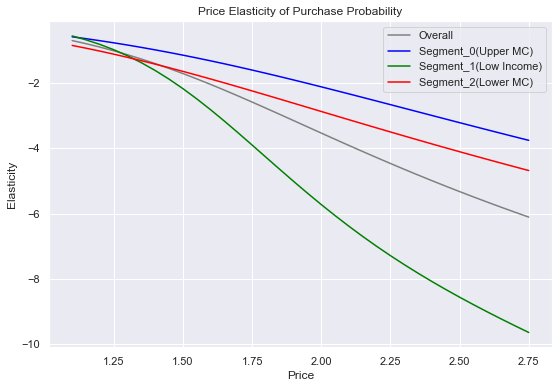

In [55]:
#plotting price elasticity
print('Analysis:\n\n01. For the Lower Middle Class segment(red line), the initial elasticity is actually lower than the Low Income Segment (green line) but then with each increase in price, demand is less sensitive in the Lower MC segment than in the Low Income Segment.\n\n02. This would imply that that customers in the Lower MC segment will not react as aggressively to an increase in price than customers in the Low Income Segment.')
plt.figure(figsize=(9,6))
plt.plot(price_range, df_price_elasticities['Mean_PE'], color = 'grey',label='Overall')
plt.plot(price_range, df_price_elasticities['PE_Segment_Upper_MC'], color = 'blue',label='Segment_0(Upper MC)')
plt.plot(price_range, df_price_elasticities['PE_Segment_Low_Income'], color = 'green',label='Segment_1(Low Income)')
plt.plot(price_range, df_price_elasticities['PE_Segment_Lower_MC'], color = 'red',label='Segment_2(Lower MC)')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend()
plt.title('Price Elasticity of Purchase Probability')

plt.show()

$\color{orange}{\text{C4d. High_Income (Segment 3)}}$

In [56]:
#filter down the dataframe to Segment 3
df_pa_segment_High_Income = df_pa[df_pa['Segment'] == 3]
#________________________________________________________________________________________________________________

#Designating Inputs and Outputs

#Average price for each brand as input
X = pd.DataFrame()
X['Mean_Price']=df_pa_segment_High_Income[['Price_1','Price_2','Price_3','Price_4','Price_5']].mean(axis=1)

# We want to predict whether the customer bought or not so df_pa['incidence']
Y=df_pa_segment_High_Income['Incidence']

In [57]:
#Model Preparation

#initiating a class (saving it to a variable)
model_purchase_High_Income=LogisticRegression(solver='sag') 

#fitting the data
model_purchase_High_Income.fit(X,Y)

#For a chance of one unit in the input(Price), output(Purchase) is going to go down by 1.82% 
model_purchase_High_Income.coef_  

array([[-1.19142349]])

In [58]:
#feed the price range into the model to predict purchase probabilities for the Standard Segment 
Y_pr_segment_High_Income=model_purchase_High_Income.predict_proba(price_range_)  #predict_proba is a logistic regression method that predicts probabilities


print(f'This predicts the probability of the different classes of logistic regression (0 or 1). The columns reflect the probabilties of 0 and 1, respectively.Below is the first 5 probabilities: \n\n{Y_pr_segment_High_Income[:5]}\n\n Since we are only interested in \'1\'s (Purchase Incidence), we can just get the 2nd column')

#"Standard" Segment Purchase probability of the product of interest as a whole (saving only the second column)
purchase_pr_segment_High_Income = Y_pr_segment_High_Income[:,1] 

This predicts the probability of the different classes of logistic regression (0 or 1). The columns reflect the probabilties of 0 and 1, respectively.Below is the first 5 probabilities: 

[[0.44317674 0.55682326]
 [0.45792274 0.54207726]
 [0.47274283 0.52725717]
 [0.48761111 0.51238889]
 [0.50250135 0.49749865]]

 Since we are only interested in '1's (Purchase Incidence), we can just get the 2nd column


In [59]:
#price elasticity (Probability of NOT buying * Price * Coeff_)
df_price_elasticities['PE_Segment_High_Income'] = model_purchase_High_Income.coef_[:,0] * price_range * (1 - purchase_pr_segment_High_Income)  


#dataframe of different price levels along with overall price elasticity and price elasticity specific to a particular segment
df_price_elasticities.head(10)

,Price_Range,Mean_PE,PE_Segment_Upper_MC,PE_Segment_Low_Income,PE_Segment_Lower_MC,PE_Segment_High_Income
0,1.10,-0.692114,-0.575483,-0.550204,-0.840586,-0.580812
1,1.15,-0.787424,-0.633529,-0.669271,-0.925441,-0.627417
2,1.20,-0.891624,-0.695135,-0.809040,-1.014864,-0.675884
3,1.25,-1.004861,-0.760316,-0.971547,-1.108713,-0.726189
4,1.30,-1.127166,-0.829066,-1.158527,-1.206808,-0.778299
5,1.35,-1.258441,-0.901355,-1.371245,-1.308931,-0.832177
6,1.40,-1.398459,-0.977131,-1.610326,-1.414834,-0.887776
7,1.45,-1.546856,-1.056318,-1.875598,-1.524241,-0.945047
8,1.50,-1.703139,-1.138819,-2.165989,-1.636851,-1.003933
9,1.55,-1.866696,-1.224514,-2.479487,-1.752347,-1.064374


Analysis:

01. For the High Income segment(orange line), Purchase Probability converts from INELASTIC TO ELASTIC at about $1.50. The elasticity line for this segment is also the least steep of all the segments - implying that customers from this segment are least sensitive to a change in price.

02. This would imply that for customers in this segment, we have to keep the price around $1.50 but even if we increase the price above that, the change in demand in this segment is much milder than in other segments.


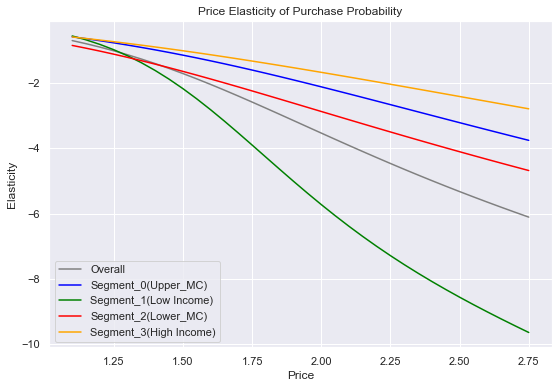

In [60]:
#plotting price elasticity
print('Analysis:\n\n01. For the High Income segment(orange line), Purchase Probability converts from INELASTIC TO ELASTIC at about $1.50. The elasticity line for this segment is also the least steep of all the segments - implying that customers from this segment are least sensitive to a change in price.\n\n02. This would imply that for customers in this segment, we have to keep the price around $1.50 but even if we increase the price above that, the change in demand in this segment is much milder than in other segments.')

plt.figure(figsize=(9,6))
plt.plot(price_range, df_price_elasticities['Mean_PE'], color = 'grey',label='Overall')
plt.plot(price_range, df_price_elasticities['PE_Segment_Upper_MC'], color = 'blue',label='Segment_0(Upper_MC)')
plt.plot(price_range, df_price_elasticities['PE_Segment_Low_Income'], color = 'green',label='Segment_1(Low Income)')
plt.plot(price_range, df_price_elasticities['PE_Segment_Lower_MC'], color = 'red',label='Segment_2(Lower_MC)')
plt.plot(price_range, df_price_elasticities['PE_Segment_High_Income'], color = 'orange',label='Segment_3(High Income)')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend()
plt.title('Price Elasticity of Purchase Probability')

plt.show()